In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

# Bump up DPI and default font sizes for readability
plt.rcParams.update({
    'figure.dpi': 150,            # higher resolution
    'font.family': 'sans-serif',
    'font.size': 12,              # base font size
    'axes.titlesize': 14,         # subplot titles
    'axes.labelsize': 12,         # x/y labels
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'grid.color': '0.85',         # very light grey grid
    'grid.linestyle': '--',
    'grid.linewidth': 0.7,
    'axes.edgecolor': '0.3',      # slightly softened axes spines
    'errorbar.capsize': 3,        # makes the error‐bar caps a little larger
    'lines.markersize': 6,        # slightly bigger dots
})

# (Optional) Only want horizontal gridlines:
plt.rcParams['axes.grid.axis'] = 'y'


## Loading:

In [374]:
data_10 = pd.read_csv('bsr_w=10.csv')
data_100 = pd.read_csv('bsr_w=100.csv')
data_500 = pd.read_csv('bsr_w=500.csv')
data = [data_10, data_100, data_500]
data_10

,sigma,filename,beam_width,heuristic,length,time_s,feasible
0,sigma-2,mglcs_10_100_2_0.txt,10,h2,4,0.0209,True
1,sigma-2,mglcs_10_100_2_0.txt,10,h5,6,0.0211,True
2,sigma-2,mglcs_10_100_2_0.txt,10,h8,6,0.0506,True
3,sigma-2,mglcs_10_100_2_1.txt,10,h2,3,0.0150,True
4,sigma-2,mglcs_10_100_2_1.txt,10,h5,3,0.0221,True
...,...,...,...,...,...,...,...
715,sigma-4,mglcs_5_50_4_8.txt,10,h5,7,0.0033,True
716,sigma-4,mglcs_5_50_4_8.txt,10,h8,7,0.0036,True
717,sigma-4,mglcs_5_50_4_9.txt,10,h2,9,0.0030,True
718,sigma-4,mglcs_5_50_4_9.txt,10,h5,9,0.0035,True


In [375]:
data_dp = pd.read_csv('dp2_fixed.csv')
data_dp = data_dp[['m', 'n', 'sigma', 'index', 'length']]
data_dp['heuristic'] = "dp2"
data_dp['beam_width'] = 0
data_dp

,m,n,sigma,index,length,heuristic,beam_width
0,2,100,2,0,80,dp2,0
1,2,100,2,1,76,dp2,0
2,2,100,2,2,79,dp2,0
3,2,100,2,3,80,dp2,0
4,2,100,2,4,76,dp2,0
5,2,100,2,5,78,dp2,0
6,2,100,2,6,77,dp2,0
7,2,100,2,7,75,dp2,0
8,2,100,2,8,76,dp2,0
9,2,100,2,9,77,dp2,0


## Preprocessing:


In [376]:
def preprocess_data(data):
    data["sigma"] = data.apply(lambda x: int(x["sigma"][6:] ), axis=1)
    data["filename"] = data.apply(lambda x: (x["filename"][6:-4] ), axis=1)
    data["m"] = data.apply(lambda x: int(x["filename"].split("_")[0]), axis=1)
    data["n"] = data.apply(lambda x: int(x["filename"].split("_")[1]), axis=1)
    data["index"] = data.apply(lambda x: int(x["filename"].split("_")[-1].split(".")[0]), axis=1)
    return data

data = [preprocess_data(d) for d in data]
data.append(data_dp)
data[0]

,sigma,filename,beam_width,heuristic,length,time_s,feasible,m,n,index
0,2,10_100_2_0,10,h2,4,0.0209,True,10,100,0
1,2,10_100_2_0,10,h5,6,0.0211,True,10,100,0
2,2,10_100_2_0,10,h8,6,0.0506,True,10,100,0
3,2,10_100_2_1,10,h2,3,0.0150,True,10,100,1
4,2,10_100_2_1,10,h5,3,0.0221,True,10,100,1
...,...,...,...,...,...,...,...,...,...,...
715,4,5_50_4_8,10,h5,7,0.0033,True,5,50,8
716,4,5_50_4_8,10,h8,7,0.0036,True,5,50,8
717,4,5_50_4_9,10,h2,9,0.0030,True,5,50,9
718,4,5_50_4_9,10,h5,9,0.0035,True,5,50,9


## Aggregation: 


In [377]:
appended_data = pd.concat(data, ignore_index=True)
appended_data = appended_data[["m",  "n", "sigma", "index", "heuristic", "beam_width", "length"]]
appended_data.to_csv("bsr_dp2.csv", index=False)

In [378]:
data_grouped = appended_data.groupby(["m", "n", "sigma", "heuristic","beam_width"] ).agg({"length": "mean"}).reset_index()
data_grouped = data_grouped[data_grouped["heuristic"]!= "dp2"]

## Visualization:

In [379]:
grouped = data_grouped.groupby(["heuristic", "beam_width"]).mean().reset_index()[["heuristic", "beam_width", "length"]]

grouped.to_csv("bsr_dp2_grouped.csv", index=False)

grouped

,heuristic,beam_width,length
0,h2,10,27.437500
1,h2,100,30.666667
2,h2,500,32.058333
3,h5,10,29.395833
4,h5,100,32.000000
5,h5,500,33.104167
6,h8,10,26.000000
7,h8,100,27.991667
8,h8,500,29.179167


In [380]:
grouped = data_grouped.groupby(["heuristic", "beam_width", "m"]).mean('length').reset_index()[["m", "heuristic", "beam_width", "length"]]

In [381]:
grouped = grouped.groupby(['m', 'heuristic', 'beam_width'])['length'].mean()

# 2. Unstack to pivot heuristic and beam_width into columns
pivoted = grouped.unstack(['heuristic', 'beam_width'])

# 3. Flatten the MultiIndex columns
pivoted.columns = [f"{h}_{bw}_length" for h, bw in pivoted.columns]

pivoted.to_csv("bsr_pivoted.csv")

pivoted

,h2_10_length,h2_100_length,h2_500_length,h5_10_length,h5_100_length,h5_500_length,h8_10_length,h8_100_length,h8_500_length
m,,,,,,,,,
2,57.600000,63.283333,67.216667,64.433333,68.900000,71.366667,55.233333,58.383333,60.816667
3,34.233333,41.416667,43.050000,35.983333,41.666667,43.616667,31.950000,36.333333,38.650000
5,13.866667,13.916667,13.916667,13.333333,13.600000,13.600000,12.950000,13.383333,13.383333
10,4.050000,4.050000,4.050000,3.833333,3.833333,3.833333,3.866667,3.866667,3.866667


In [382]:
#Summary statistics:

# 1. Load data
df = pd.read_csv('bsr_dp2.csv')

# 2. Compute summary statistics for length by heuristic and beam_width
summary_stats = (
    df
    .groupby(['heuristic', 'beam_width'])['length']
    .agg(
        mean='mean',
        std='std',
        min='min',
        Q1=lambda x: x.quantile(0.25),
        median='median',
        Q3=lambda x: x.quantile(0.75),
        max='max'
    )
    .reset_index()
)

summary_stats.to_csv('bsr_summary_stats.csv', index=False)

summary_stats

,heuristic,beam_width,mean,std,min,Q1,median,Q3,max
0,dp2,0,81.950000,46.226937,28,38.00,70.5,127.25,161
1,h2,10,27.437500,27.307873,2,6.75,19.0,38.00,159
2,h2,100,30.666667,30.797444,2,6.75,20.0,43.00,158
3,h2,500,32.058333,33.039293,2,6.75,20.0,43.25,158
4,h5,10,29.395833,31.133899,2,6.00,19.0,38.00,159
5,h5,100,32.000000,33.748392,2,6.00,20.0,42.25,159
6,h5,500,33.104167,35.374174,2,6.00,20.0,44.75,159
7,h8,10,26.000000,26.961153,2,6.00,17.5,35.00,152
8,h8,100,27.991667,29.001081,2,6.00,19.0,38.25,152
9,h8,500,29.179167,29.675462,2,6.00,19.5,40.00,145


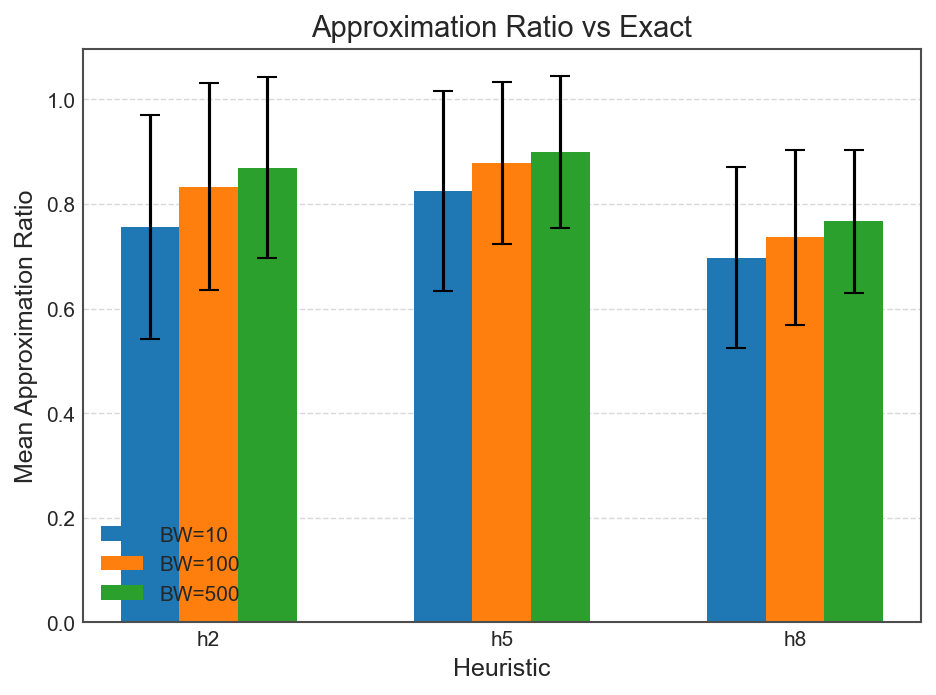

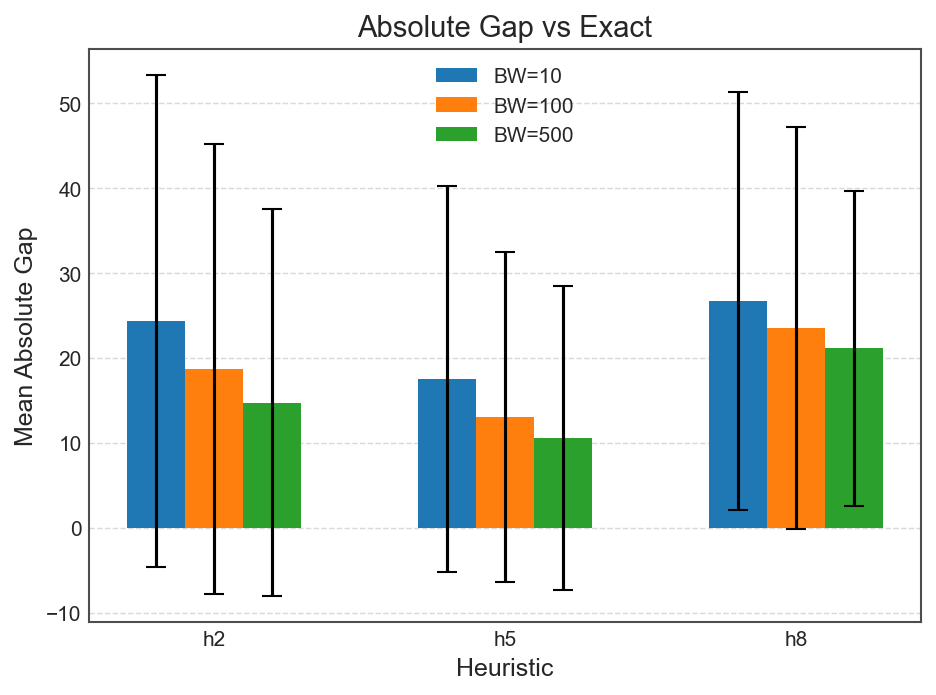

In [ ]:
# Load data
df = pd.read_csv('bsr_dp2.csv')

# Extract exact results (heuristic 'dp2', beam_width 0)
exact = (
    df[(df.heuristic == 'dp2') & (df.beam_width == 0)]
    .rename(columns={'length': 'exact_length'})
    [['m', 'n', 'sigma', 'index', 'exact_length']]
)

# Filter approximate results
approx = df[df.heuristic != 'dp2']

# Merge to get exact_length alongside each approx result
merged = approx.merge(exact, on=['m', 'n', 'sigma', 'index'], how='inner')

# Compute approximation ratio and absolute gap
merged['ratio'] = merged['length'] / merged['exact_length']
merged['gap'] = merged['exact_length'] - merged['length']

# Aggregate mean and std dev by heuristic and beam_width
summary = (
    merged
    .groupby(['heuristic', 'beam_width'])
    .agg(
        mean_ratio=('ratio', 'mean'),
        std_ratio=('ratio', 'std'),
        mean_gap=('gap', 'mean'),
        std_gap=('gap', 'std'),
    )
    .reset_index()
)

# Pivot for plotting
pivot_ratio = summary.pivot(index='heuristic', columns='beam_width', values='mean_ratio')
pivot_std_ratio = summary.pivot(index='heuristic', columns='beam_width', values='std_ratio')
pivot_gap = summary.pivot(index='heuristic', columns='beam_width', values='mean_gap')
pivot_std_gap = summary.pivot(index='heuristic', columns='beam_width', values='std_gap')

# Plot: Approximation Ratio
fig, ax = plt.subplots()
width = 0.2
x = list(range(len(pivot_ratio.index)))
for i, bw in enumerate(pivot_ratio.columns):
    ax.bar(
        [xi + i*width for xi in x],
        pivot_ratio[bw],
        width=width,
        yerr=pivot_std_ratio[bw],
        capsize=5,
        label=f'BW={bw}'
    )
ax.set_xticks([xi + width for xi in x])
ax.set_xticklabels(pivot_ratio.index)
ax.set_xlabel('Heuristic')
ax.set_ylabel('Mean Approximation Ratio')
ax.set_title('Approximation Ratio vs Exact')
ax.legend()
plt.tight_layout()
plt.show()

# Plot: Absolute Gap
fig, ax = plt.subplots()
for i, bw in enumerate(pivot_gap.columns):
    ax.bar(
        [xi + i*width for xi in x],
        pivot_gap[bw],
        width=width,
        yerr=pivot_std_gap[bw],
        capsize=5,
        label=f'BW={bw}'
    )
ax.set_xticks([xi + width for xi in x])
ax.set_xticklabels(pivot_gap.index)
ax.set_xlabel('Heuristic')
ax.set_ylabel('Mean Absolute Gap')
ax.set_title('Absolute Gap vs Exact')
ax.legend()
plt.tight_layout()
plt.show()


C:\Users\nikol\AppData\Local\Temp\ipykernel_4608\2772948300.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, labels=heuristics)
C:\Users\nikol\AppData\Local\Temp\ipykernel_4608\2772948300.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, labels=heuristics)
C:\Users\nikol\AppData\Local\Temp\ipykernel_4608\2772948300.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, labels=heuristics)
C:\Users\nikol\AppData\Local\Temp\ipykernel_4608\2772948300.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tic

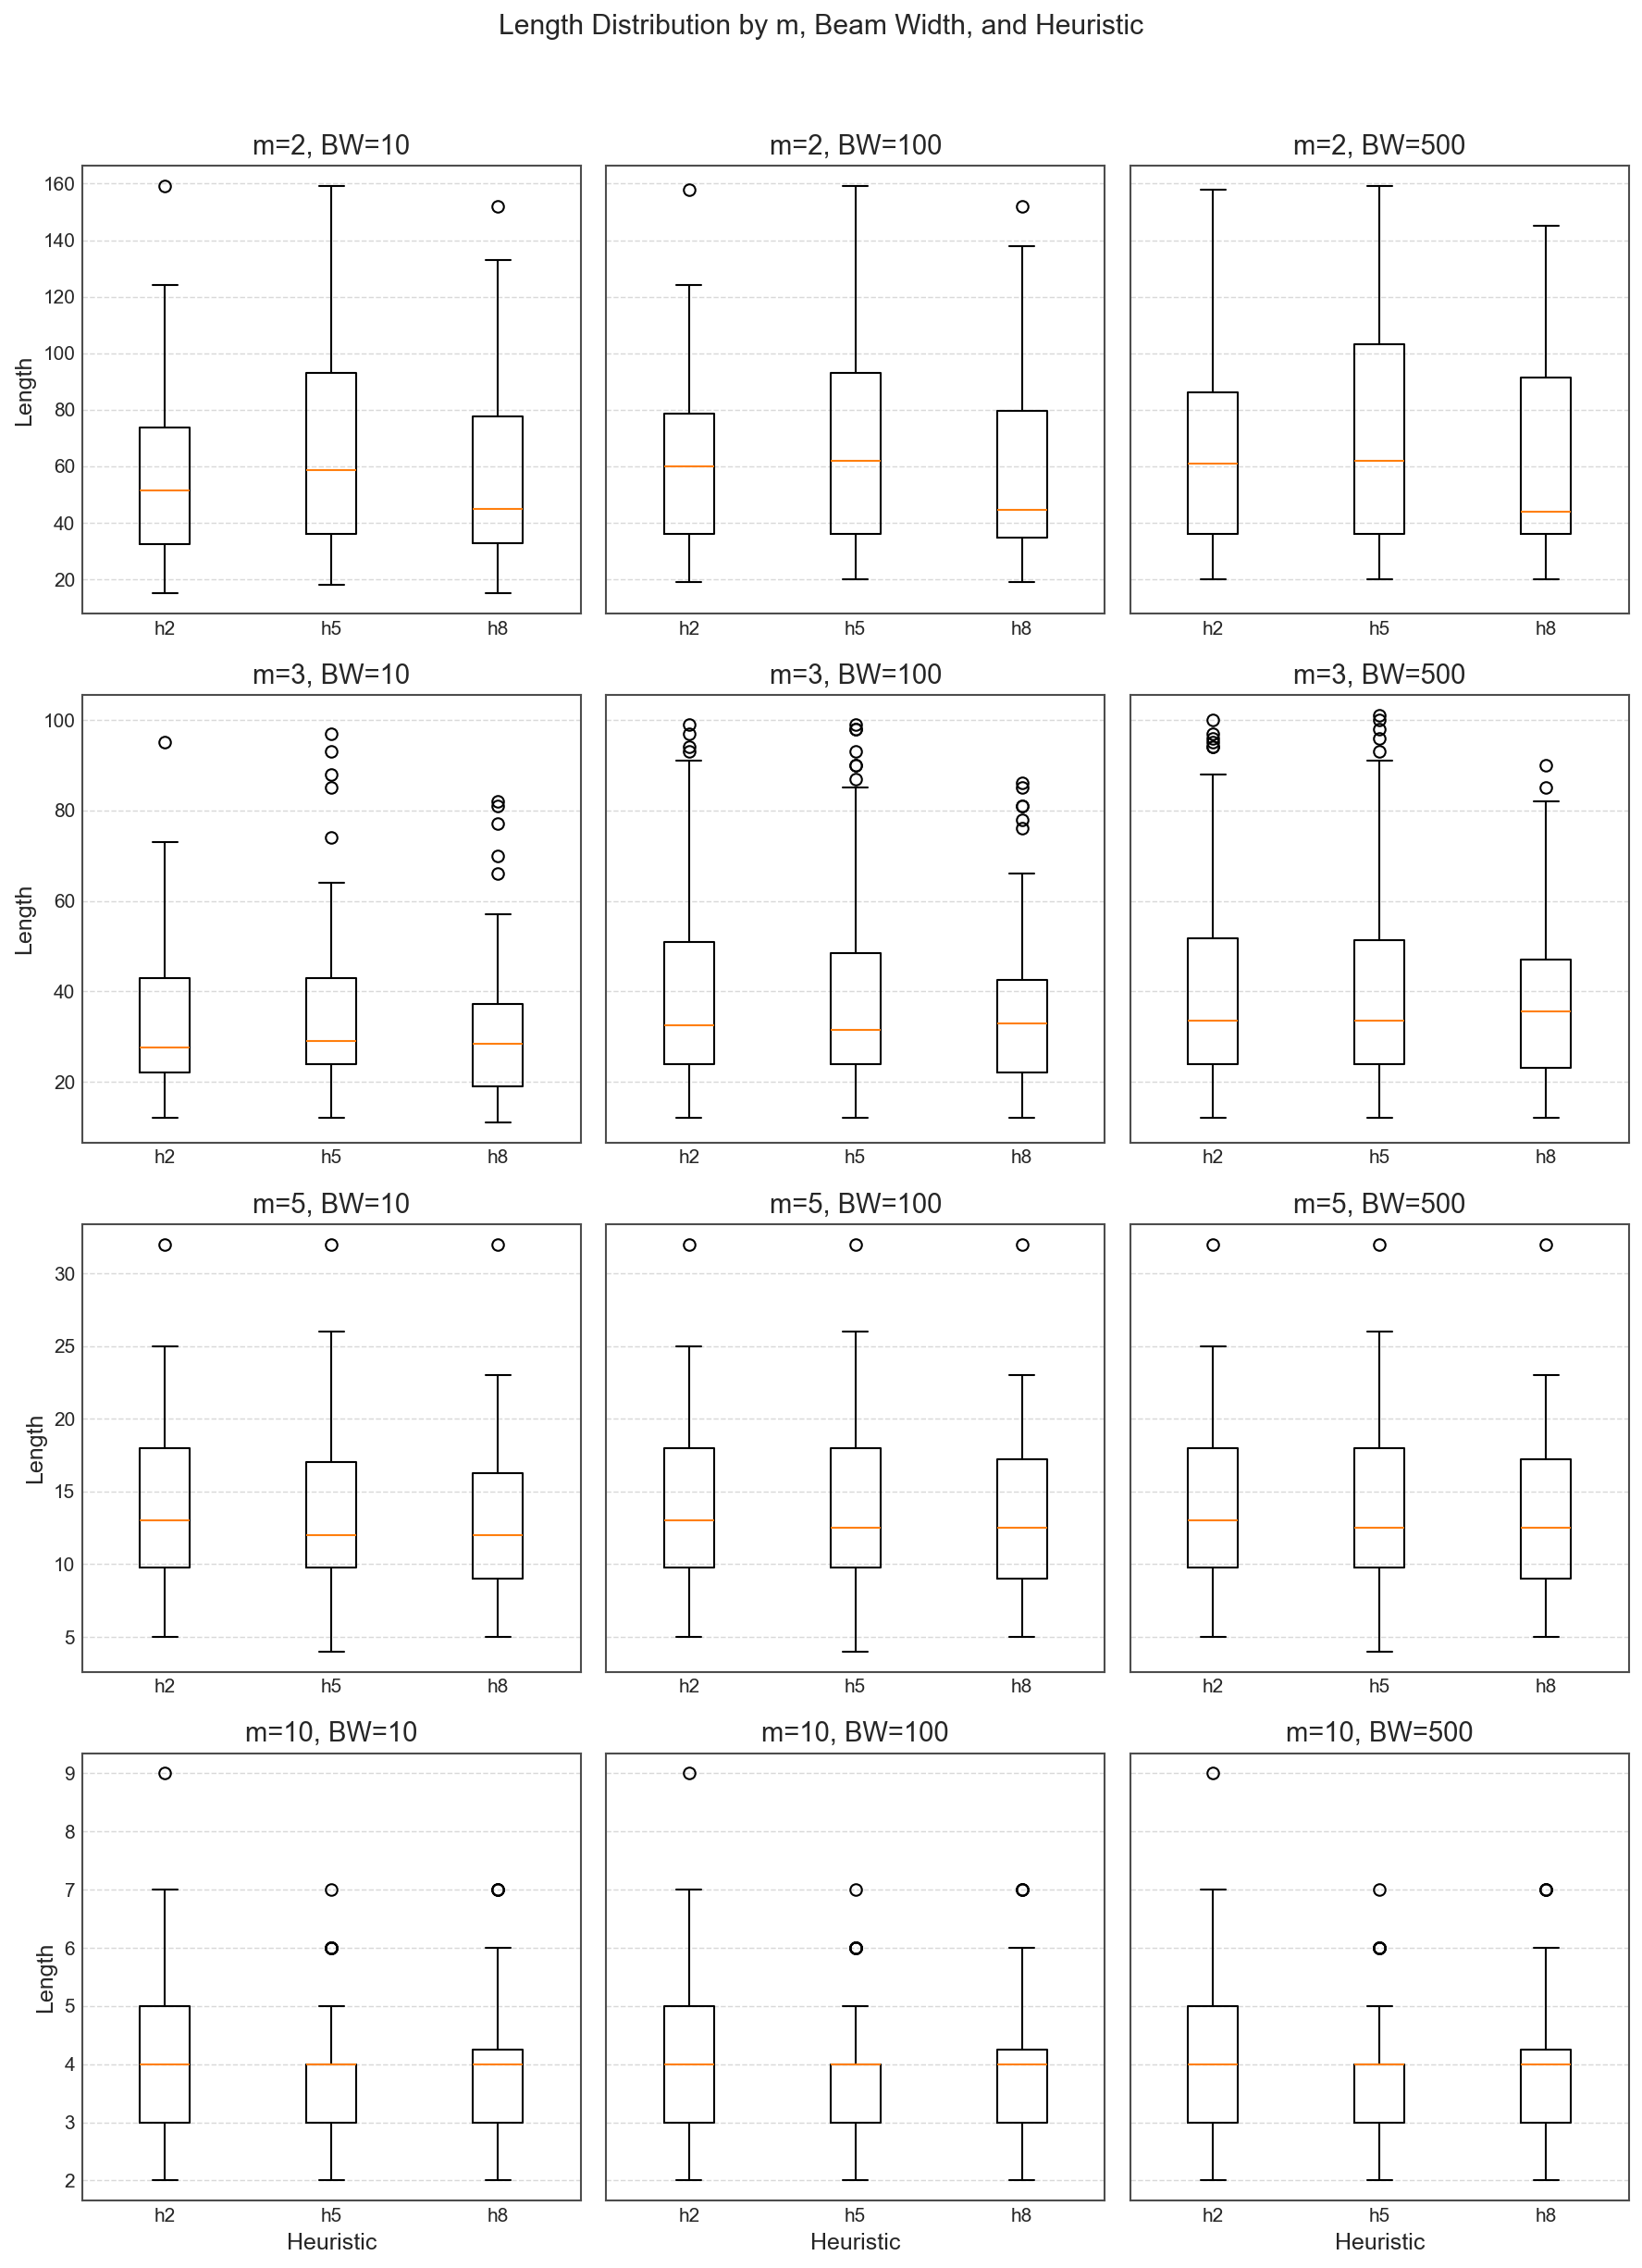

In [384]:
# Load data and exclude 'dp2'
df = pd.read_csv('bsr_dp2.csv')
df = df[df['heuristic'] != 'dp2']

# Unique m values and beam widths
m_values = sorted(df['m'].unique())
beam_widths = sorted(df['beam_width'].unique())
heuristics = ['h2', 'h5', 'h8']

# Set up subplot grid: rows by m, columns by beam width
fig, axes = plt.subplots(len(m_values), len(beam_widths), 
                         figsize=(4 * len(beam_widths), 4 * len(m_values)), 
                         sharey='row')

# If only one row or one column, ensure axes is 2D
if len(m_values) == 1:
    axes = axes.reshape(1, -1)
if len(beam_widths) == 1:
    axes = axes.reshape(-1, 1)

# Populate each subplot
for i, m in enumerate(m_values):
    for j, bw in enumerate(beam_widths):
        ax = axes[i, j]
        # Gather data for each heuristic
        data_to_plot = [
            df[(df['m'] == m) & (df['beam_width'] == bw) & (df['heuristic'] == h)]['length']
            for h in heuristics
        ]
        ax.boxplot(data_to_plot, labels=heuristics)
        ax.set_title(f'm={m}, BW={bw}')
        if j == 0:
            ax.set_ylabel('Length')
        if i == len(m_values) - 1:
            ax.set_xlabel('Heuristic')

# Overall title and layout
fig.suptitle('Length Distribution by m, Beam Width, and Heuristic', y=1.02)
plt.tight_layout()
plt.show()



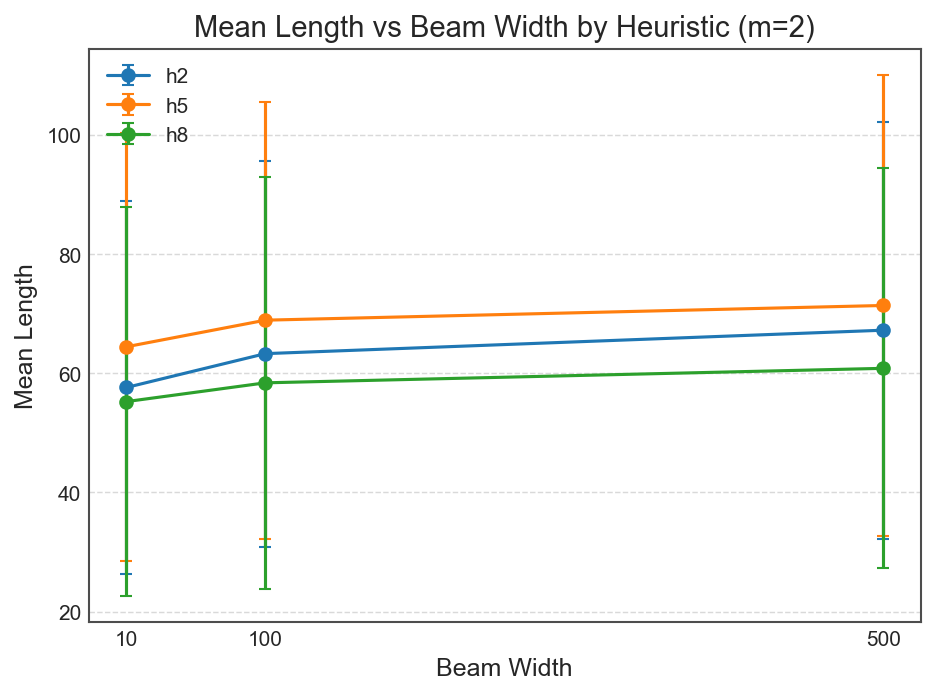

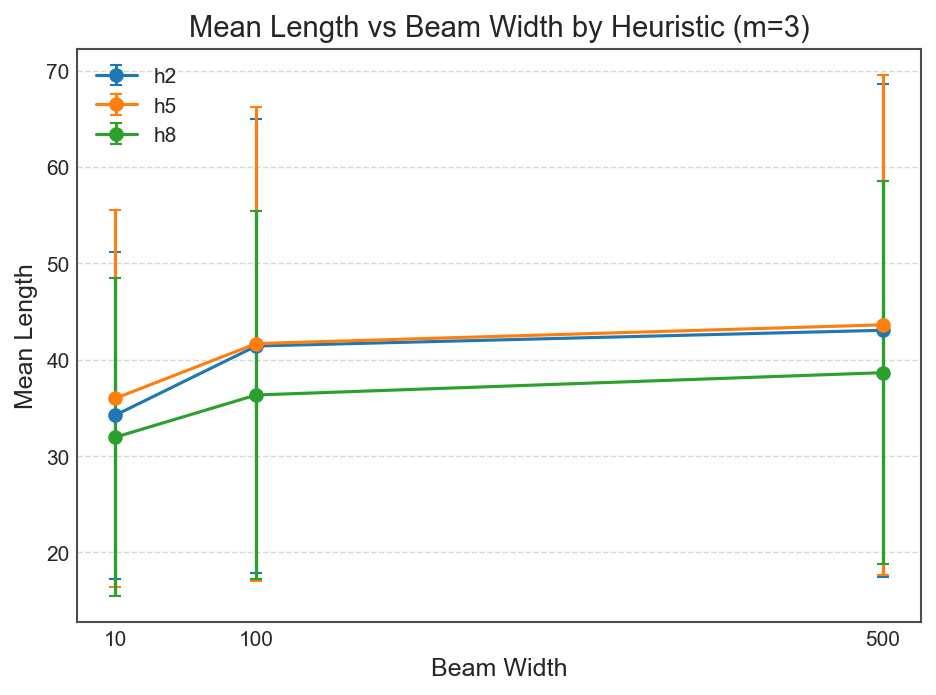

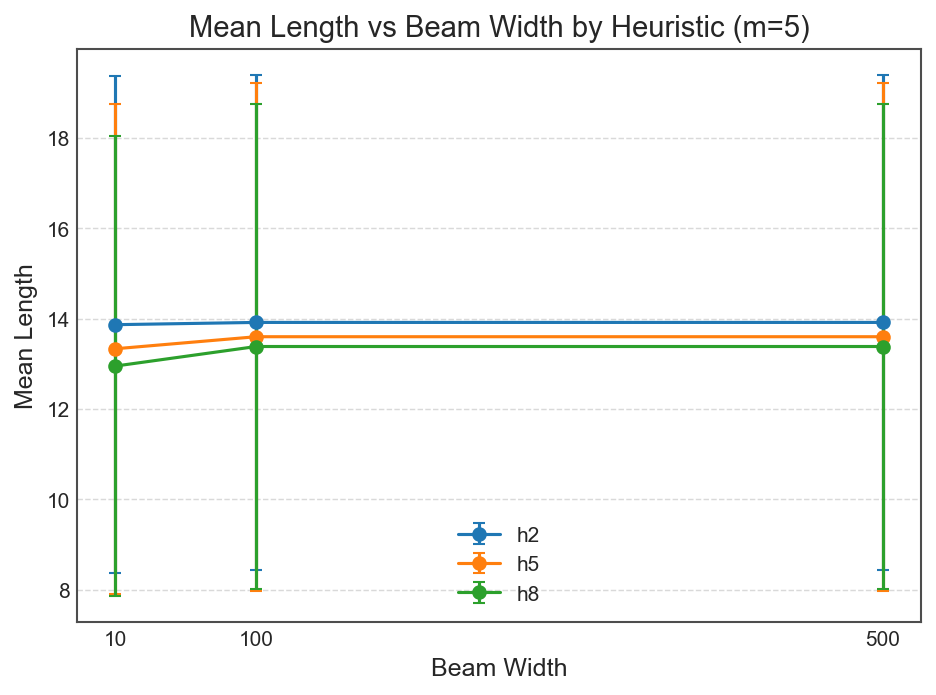

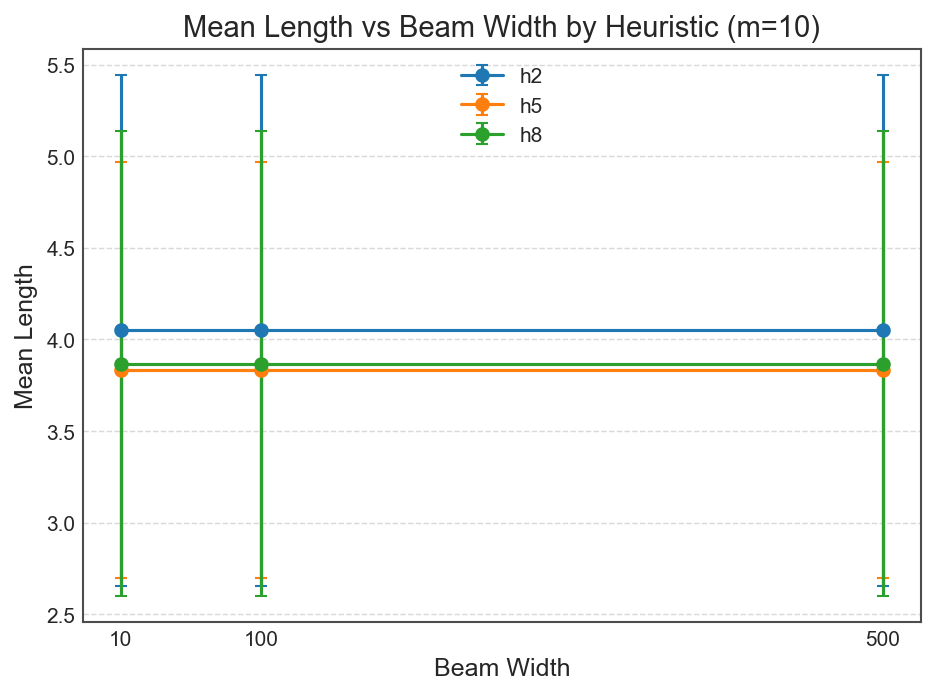

In [385]:
# Load data and exclude 'dp2'
df = pd.read_csv('bsr_dp2.csv')
df = df[df['heuristic'] != 'dp2']

# Parameters
m_values = sorted(df['m'].unique())
beam_widths = sorted(df['beam_width'].unique())
heuristics = ['h2', 'h5', 'h8']

# Generate a separate plot for each m
for m in m_values:
    # Compute mean and std for this m
    stats = (
        df[df['m'] == m]
        .groupby(['heuristic', 'beam_width'])['length']
        .agg(['mean', 'std'])
        .reset_index()
    )

    # Plot
    fig, ax = plt.subplots()
    for h in heuristics:
        sub = stats[stats['heuristic'] == h].set_index('beam_width').reindex(beam_widths)
        ax.errorbar(
            beam_widths,
            sub['mean'],
            yerr=sub['std'],
            marker='o',
            linestyle='-',
            label=h
        )

    ax.set_xticks(beam_widths)
    ax.set_xlabel('Beam Width')
    ax.set_ylabel('Mean Length')
    ax.set_title(f'Mean Length vs Beam Width by Heuristic (m={m})')
    ax.legend()
    plt.tight_layout()
    plt.show()


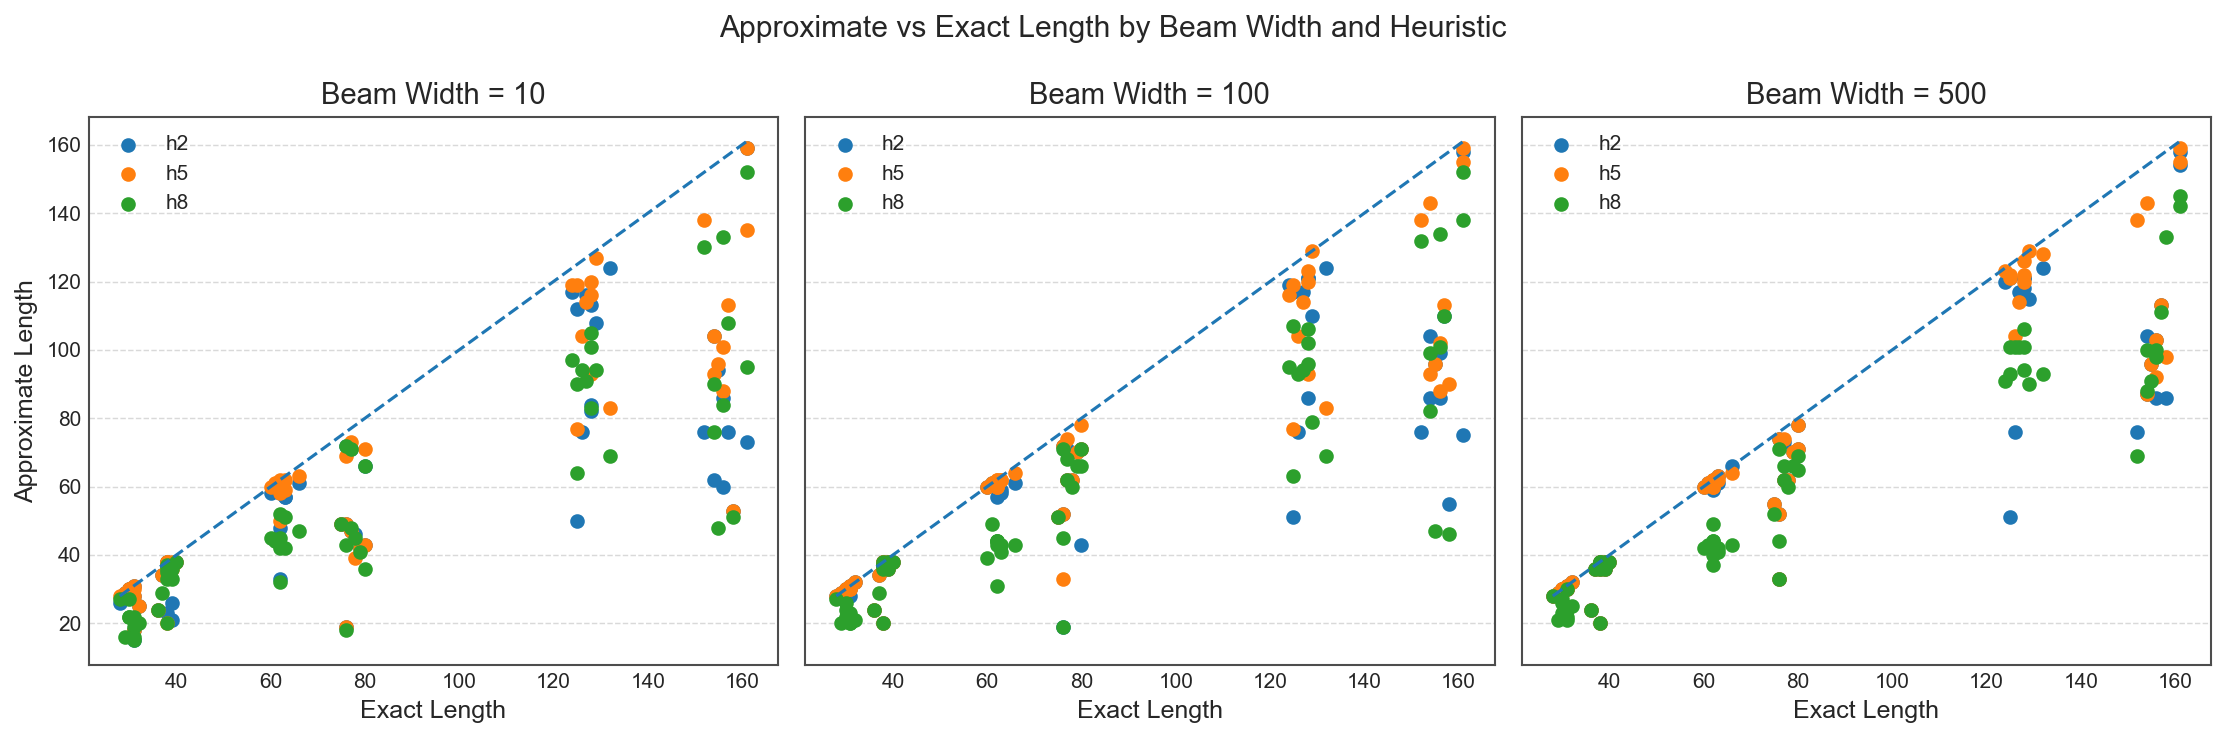

In [ ]:
df = pd.read_csv('bsr_dp2.csv')

# Extract exact results (dp2) and approximate results
exact = (
    df[(df['heuristic'] == 'dp2') & (df['beam_width'] == 0)]
    .rename(columns={'length': 'exact_length'})
    [['m', 'n', 'sigma', 'index', 'exact_length']]
)
approx = df[df['heuristic'] != 'dp2'][['m', 'n', 'sigma', 'index', 'heuristic', 'beam_width', 'length']]

# Merge to align exact and approximate
merged = approx.merge(exact, on=['m', 'n', 'sigma', 'index'], how='inner')

# Setup subplots for each beam width
beam_widths = sorted(merged['beam_width'].unique())
fig, axes = plt.subplots(1, len(beam_widths), figsize=(5 * len(beam_widths), 5), sharex=True, sharey=True)

# Plot each subplot
for ax, bw in zip(axes, beam_widths):
    sub = merged[merged['beam_width'] == bw]
    for h in ['h2', 'h5', 'h8']:
        data = sub[sub['heuristic'] == h]
        ax.scatter(data['exact_length'], data['length'], label=h)
    # Identity line
    min_len = merged['exact_length'].min()
    max_len = merged['exact_length'].max()
    ax.plot([min_len, max_len], [min_len, max_len], linestyle='--')
    ax.set_title(f'Beam Width = {bw}')
    ax.set_xlabel('Exact Length')
    if bw == beam_widths[0]:
        ax.set_ylabel('Approximate Length')
    ax.legend()

fig.suptitle('Approximate vs Exact Length by Beam Width and Heuristic')
plt.tight_layout()
plt.show()
